# **TITLE: US ELECTION, VOTING PARTICIPATION AND DISTRIBUTION**

**Authors**: Onyenkwu Nnadozie and Oluwatobi Ezekiel Adefisan

##### **Keywords**: population, demographics, politics, governance, USElection

##### **SDG goals**:


* Peace, Justice and Strong Institution (Goal 16)

### **Abstract** (200words)

The distribution of votes and consistency of voting for US presidential elections are directly a product of popular votes. They are not determined directly by citizens but by electors through a process called the Electoral college. The election data analysis determined voting pattern, voting behaviour, percentage change in total votes and political party voting progress.

The final result of the analysis showed that 20 states voted consistently for the REBUBLICANS in 2012, 2016 and 2020. This voting behavior can be seen as a dividend of good governance enjoyed by the resident of the listed states. The states can be classified as strongholds to success by the Democrat and can be a strategic data for planning by the Democrat future elections.


The final analysis showed that the 13 states voted consistently for the DEMOCRAT in 2012, 2016 and 2020. This voting behavior can be seen as a dividend of good governance enjoyed by the resident of the listed states.The states can be classified as strongholds to success by the Republican and can be a strategic data for planning by the Republican future elections.

### **1.0. Introduction**

The 2023 presidential election for the Federal Republic of Nigeria is right at the corner. It is scheduled for the 25th of January 2023 and it is an event every patriotic citizen will love to witness or experience. It is important because an election is one of the major determinants of growth and development in democracy.

As Nigerians and 2022 scholars of the Erasmus Masters in Geospatial Technologies, it is evident that we will be unavoidably absent and unable to vote for our chosen candidate. But we believe we still do our best to ensure a free and fair election by using our data science skills to answer some logical election questions about voting, participation of voters, and distribution of votes and candidacy across geography. We are limited by the absence of past election datasets for our country and were unable to meet our objectives. So, we decided to use the available US election data from the data archive as preparation for our future analysis and election predictions.





### **2.0. Data Used**


The datasets used for this project analysis include:

1.   The [Havard Dataverse](https://dataverse.harvard.edu/file.xhtml?fileId=4299753&version=6.0) US Presidential Elections (1976-2020) data and
2. The [Natural Earth](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/) administrative (level 1) Data for US states and provinces.


##### **2.1. Data information**
> The **Election data** is a data in .csv format while the administrative data (in .shp) is a geometry data in a zip file.

> The most relevant columns of the  election data are; _**year**_, _**state**_	, _**state_po**_ , _**candidate**_ ,	_**candidatevotes**_ ,_**totalvotes**_ ,	and _**party_simplified**_ . The _**party_simplified**_ column is a simplified column for the major parties in the US. It is subdivided into four major categories namely; _**Democrat**_, _**Republican**_, _**Libertarian**_ and _**others**_.

* NB: These classification will be used in further analysis to show the voting and election distribution for the 50 states in the US.

> The major column of the **Administrative data** is the _**geometry**_ and the _**name_alt**_ column. The _**name_alt**_ column contains the names of the states and the state alias. For example, in the dataset, Alaska has its _*name_alt*_ as AK|Alaska which is a combination of it alias (e.g. alternative name AK) and the fullname (e.g. Alaska).

* NB: The alias or alternative name of the US administrative boundaries is similar to the data in the _**state_po**_ column of the US election data. This will serve as the basis of joining (merging) the two dataframes (spatial and non-spatial data) for the project analysis.

### **3.0. Python Libraries used**

In [ ]:
#!pip freeze


##### The following are the list of major libraries and versions used for this project:



*   Pandas (version 1.3.5)
*   Geopandas (version 0.12.1)
*   Matplotlib (version 3.2.2)
*   Seaborn (version 0.11.2)
*   Shapely (version 1.8.5.post1)

Note: Some of the libraries are installed in the code using the python pip installation. e.g. geopandas

```
!pip install geopandas

```

while others are already in-built into the colab environment and will only need to be imported. For example, pandas is imported using the code below:


```
import pandas as pd
import matplotlib.pyplot as plt
```



### **4.0. Data Processing**

The data processing steps include:
1. reading the election data file in .csv format and the world data in .shp format
2. basic data exploration
3. dropping irrelevant columns from the dataframe
4. renaming the *party_simplified* column as *party*
5. creating the two new columns (e.g. *percentage* and *decision* columns) relevant for the project analysis
6. subsetting the dataframe into four different election years (e.g. 2008, 2012, 2016, and 2020)
7. writing the subsetted dataframes (e.g. the four dataframes) to file and reading the files from csv to ensure it is properly saved.

In [ ]:
import pandas as pd
# imports the pandas library for the dataframe
import matplotlib.pyplot as plt
# imports the matplotlib for plotting and saving plots to image

##### **4.1. Reading the Dataset**

The dataset in .csv format was stored in a variable **path** and reading using the pandas.dataframe.read_csv() method.


[Google Drive location of our two datasets](https://drive.google.com/drive/folders/1jalj86yNV4OzvPlTmYAw1yebCClTUyle?usp=share_link)

In [ ]:
# reads the csv file
path = '/content/drive/MyDrive/DataScience_Project/002-Data_raw/1976-2020-US-PresidentialElection.csv'
US_Election1976_2020 = pd.read_csv(path, sep =',')

###### **4.2. Data Exploration**

This process involves the exploration of the basic attributes and/or features of the dataset. The basic attributes of the datasets includes; the total number of rows, total number of columns, presence of null values and general information about the data, and the column names in the dataframe.

In [ ]:
# displays the first ten rows of the dataframe
US_Election1976_2020.head(10)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
5,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,1481,1182850,20210113,NaN,LIBERTARIAN
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,308,1182850,20210113,NaN,OTHER
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN


In [ ]:
# displays the last five rows of the dataframe
US_Election1976_2020.tail()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER
4286,2020,WYOMING,WY,56,83,68,US PRESIDENT,UNDERVOTES,NaN,False,1459,278503,20210113,NaN,OTHER


In [ ]:
# displays the general information about the dataframe
US_Election1976_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


In [ ]:
# shows the total number of rows (4287) and columns (15) present in the dataframe
US_Election1976_2020.shape

(4287, 15)

In [ ]:
# displays all the available columns in the dataframe
US_Election1976_2020.columns.values

array(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party_detailed', 'writein',
       'candidatevotes', 'totalvotes', 'version', 'notes',
       'party_simplified'], dtype=object)

##### **4.3. Dropping Irrelevant columns from the dataframe**

Irrelevant columns are basically columns that are not useful for our analysis. These columns include: the state_fips, state_cen, office, party_detailed, version, notes, and writein columns.

In [ ]:
# drops irrelevant columns from the dataframe
US_Election1976_2020.drop(["state_fips", "state_cen", "state_ic", "office", "party_detailed", "version", "notes", "writein"], axis=1, inplace=True)
US_Election1976_2020

,year,state,state_po,candidate,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,AL,"CARTER, JIMMY",659170,1182850,DEMOCRAT
1,1976,ALABAMA,AL,"FORD, GERALD",504070,1182850,REPUBLICAN
2,1976,ALABAMA,AL,"MADDOX, LESTER",9198,1182850,OTHER
3,1976,ALABAMA,AL,"BUBAR, BENJAMIN """"BEN""""",6669,1182850,OTHER
4,1976,ALABAMA,AL,"HALL, GUS",1954,1182850,OTHER
...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,"JORGENSEN, JO",5768,278503,LIBERTARIAN
4283,2020,WYOMING,WY,"PIERCE, BROCK",2208,278503,OTHER
4284,2020,WYOMING,WY,NaN,1739,278503,OTHER
4285,2020,WYOMING,WY,OVERVOTES,279,278503,OTHER


##### **4.4. Renaming the *party_simplified* Column**

The naming convention used for the dataframe implies that the party_simplified column is the column for the summary of all parties in the US.

In [ ]:
US_Election1976_2020['party_simplified'].unique()

array(['DEMOCRAT', 'REPUBLICAN', 'OTHER', 'LIBERTARIAN'], dtype=object)

With the help of the Pandas  [Series.unique()](https://www.google.com/) function above, we can see that there are four categories of parties in this column, which have values: Democrat, Republican, Other, and Libertarian respectively.

It is important to note that the Others category is basically used to denote the small parties with little or no political recognition.

In [ ]:
# renames the party_simplified column
US_Election1976_2020 = US_Election1976_2020.rename({'party_simplified':'party'}, axis = 1)
US_Election1976_2020

,year,state,state_po,candidate,candidatevotes,totalvotes,party
0,1976,ALABAMA,AL,"CARTER, JIMMY",659170,1182850,DEMOCRAT
1,1976,ALABAMA,AL,"FORD, GERALD",504070,1182850,REPUBLICAN
2,1976,ALABAMA,AL,"MADDOX, LESTER",9198,1182850,OTHER
3,1976,ALABAMA,AL,"BUBAR, BENJAMIN """"BEN""""",6669,1182850,OTHER
4,1976,ALABAMA,AL,"HALL, GUS",1954,1182850,OTHER
...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,"JORGENSEN, JO",5768,278503,LIBERTARIAN
4283,2020,WYOMING,WY,"PIERCE, BROCK",2208,278503,OTHER
4284,2020,WYOMING,WY,NaN,1739,278503,OTHER
4285,2020,WYOMING,WY,OVERVOTES,279,278503,OTHER


#####  **4.5. Creating New columns - the *percentage* and *decision* columns.**

1. A function was defined to create a new column called *percentage*, calculate the percentage vote for each candidate in each state and store the results in that same column.
> The percentage column is the column for the percentage number of votes for each party/candidate in relation to the total votes for each state in the US.



In [ ]:
# Function that calculates the percentage vote of each candidate/party with respect to the totalvotes from each state
def percentage_calculator(row):
  return (row["candidatevotes"] / row["totalvotes"] * 100)

In [ ]:
# creates a new column percentage that stores the percentage vote for each party or candidate from the total vote.
US_Election1976_2020["percentage"] = US_Election1976_2020.apply(percentage_calculator, axis = 1)
US_Election1976_2020.head(2)

,year,state,state_po,candidate,candidatevotes,totalvotes,party,percentage
0,1976,ALABAMA,AL,"CARTER, JIMMY",659170,1182850,DEMOCRAT,55.727269
1,1976,ALABAMA,AL,"FORD, GERALD",504070,1182850,REPUBLICAN,42.614871


```
According to US Election policy, only candidates who won \n 50.1% of a state total vote is regarded as the winner of that state. We will extract candidates/parties that won in each state using the condition that the percentagevote is greater than or equal to 50.1%.
```

```
US_Election1976_2020[US_Election1976_2020["percentage"] >= 50.1]
```



2. Another function was defined to create a new column called *decision*, which determines whether a party wins or lose in a state or not.
> The *decision* column is the column for determining whether a party wins or lose in a particular state. To achieve this, we used the assumption that parties with percentagevotes greater than or equal to 50.1% (i.e.percentagevote >= 50.1%) of the entire state vote is the winner for that state, while parties with percentagevotes less than the 50.1% value are automatic losers.

In [ ]:
# function that determines whether a party wins or lose in a state or not.
def set_decision(df, percentage_column, decision_column):
  df.loc[df[percentage_column] >= 50.1, decision_column] = "WON"
  df.loc[df[percentage_column] < 50.1, decision_column] = "LOST"

In [ ]:
# calling the function
set_decision(US_Election1976_2020, "percentage", "decision")

##### **4.6. Subsetting the Dataframe into Four Different Election Years (e.g. 2008, 2012, 2016, and 2020)**

The data for the four different election years (e.g. 2008, 2012, 2016, and 2020) were retrieved from the *US_Election1976_2020* dataframe using the *year* column, so as to enable easy comparison between the years, and enhance quality visualization.

In [ ]:
# filters out the 2008 election data
US_Election_2008 = US_Election1976_2020[US_Election1976_2020["year"] == 2008]
US_Election_2008.head(2)

,year,state,state_po,candidate,candidatevotes,totalvotes,party,percentage,decision
2728,2008,ALABAMA,AL,"MCCAIN, JOHN",1266546,2099819,REPUBLICAN,60.316913,WON
2729,2008,ALABAMA,AL,"OBAMA, BARACK H.",813479,2099819,DEMOCRAT,38.740434,LOST


In [ ]:
# filters out the 2012 election data
US_Election_2012 = US_Election1976_2020[US_Election1976_2020["year"] == 2012]
US_Election_2012.head(2)

,year,state,state_po,candidate,candidatevotes,totalvotes,party,percentage,decision
3079,2012,ALABAMA,AL,"ROMNEY, MITT",1255925,2074338,REPUBLICAN,60.545822,WON
3080,2012,ALABAMA,AL,"OBAMA, BARACK H.",795696,2074338,DEMOCRAT,38.359033,LOST


In [ ]:
# filters out the 2016 election data
US_Election_2016 = US_Election1976_2020[US_Election1976_2020["year"] == 2016]
US_Election_2016.head(2)

,year,state,state_po,candidate,candidatevotes,totalvotes,party,percentage,decision
3395,2016,ALABAMA,AL,"TRUMP, DONALD J.",1318255,2123372,REPUBLICAN,62.083092,WON
3396,2016,ALABAMA,AL,"CLINTON, HILLARY",729547,2123372,DEMOCRAT,34.357946,LOST


In [ ]:
# filters out the 2020 election data
US_Election_2020 = US_Election1976_2020[US_Election1976_2020["year"] == 2020]
US_Election_2020.head(2)

,year,state,state_po,candidate,candidatevotes,totalvotes,party,percentage,decision
3740,2020,ALABAMA,AL,"BIDEN, JOSEPH R. JR",849624,2323282,DEMOCRAT,36.569990,LOST
3741,2020,ALABAMA,AL,"TRUMP, DONALD J.",1441170,2323282,REPUBLICAN,62.031643,WON


##### **4.7. Writing and Reading the Subsetted Dataframes**

The subsetted dataframes (e.g. the four dataframes) were writen to file to create a local copy in the drive, and were also read from file to ensure they are properly saved in the local drive.

In [ ]:
# Writing to file
US_Election_2008.to_csv("US_Election_2008.csv", index=False)
US_Election_2012.to_csv("US_Election_2012.csv", index=False)
US_Election_2016.to_csv("US_Election_2016.csv", index=False)
US_Election_2020.to_csv("US_Election_2020.csv", index=False)

In [ ]:
# Reading from file
US_Election2008 = pd.read_csv("US_Election_2008.csv")
US_Election2012 = pd.read_csv("US_Election_2012.csv")
US_Election2016 = pd.read_csv("US_Election_2016.csv")
US_Election2020 = pd.read_csv("US_Election_2020.csv")

In [ ]:
US_Election2008.head(2)

,year,state,state_po,candidate,candidatevotes,totalvotes,party,percentage,decision
0,2008,ALABAMA,AL,"MCCAIN, JOHN",1266546,2099819,REPUBLICAN,60.316913,WON
1,2008,ALABAMA,AL,"OBAMA, BARACK H.",813479,2099819,DEMOCRAT,38.740434,LOST


In [ ]:
US_Election2012.head(2)

,year,state,state_po,candidate,candidatevotes,totalvotes,party,percentage,decision
0,2012,ALABAMA,AL,"ROMNEY, MITT",1255925,2074338,REPUBLICAN,60.545822,WON
1,2012,ALABAMA,AL,"OBAMA, BARACK H.",795696,2074338,DEMOCRAT,38.359033,LOST


In [ ]:
US_Election2016.head(2)

,year,state,state_po,candidate,candidatevotes,totalvotes,party,percentage,decision
0,2016,ALABAMA,AL,"TRUMP, DONALD J.",1318255,2123372,REPUBLICAN,62.083092,WON
1,2016,ALABAMA,AL,"CLINTON, HILLARY",729547,2123372,DEMOCRAT,34.357946,LOST


In [ ]:
US_Election2020.head(2)

,year,state,state_po,candidate,candidatevotes,totalvotes,party,percentage,decision
0,2020,ALABAMA,AL,"BIDEN, JOSEPH R. JR",849624,2323282,DEMOCRAT,36.569990,LOST
1,2020,ALABAMA,AL,"TRUMP, DONALD J.",1441170,2323282,REPUBLICAN,62.031643,WON


### **5.0. Data Analysis and Visualization**
The data analysis and visualizations involves:
1. renaming the party, state, candidatevotes, and percentage columns, and appending an underscore and the two digits representing the election year (e.g. _08, _12, _16, and _20 for year 2008, 2012, 2016, and 2020 respectively) to the existing names, so as to create distinct column names for the columns in the different dataframes.
2. grouping by states and parties, and aggregating based on the sum of candidatevotes and percentage (%) votes for each of the four election years (e.g. 2008-2020).  
3. plotting a bar chart of the **voting distribution of each election year per states** in the US
4. plotting a pie chart to show the **percentage distribution of votes by parties in US** for each year.
5. Spatial Analysis:
* Merging the three dataframes
* determining states that consistently voted for the two major parties (Democrat and the Republican) in the last three consecutive election years (2008, 2012, and 2020)
* Downloading and Reading the Spatial data
* Extracting data of US from the world data
* Creating new column to serve as the primary/foreign key for joining the spatial and non-spatial data
* Merging Spatial and Non-Spatial Data
* Embelishment of winners and loser maps for year 2008, 2012, 2016, and 2020



##### **5.1. Renaming the party, state, candidatevotes, and percentage columns**

In [ ]:
US_Election2008 = US_Election2008.rename({'party':'party_08', 'state':'state_08', 'candidatevotes': 'candidatevotes_08', 'percentage':'percentagevotes_08'}, axis = 1)
US_Election2012 = US_Election2012.rename({'party':'party_12', 'state':'state_12', 'candidatevotes': 'candidatevotes_12', 'percentage':'percentagevotes_12'}, axis = 1)
US_Election2016 = US_Election2016.rename({'party':'party_16', 'state':'state_16','candidatevotes': 'candidatevotes_16', 'percentage':'percentagevotes_16'}, axis = 1)
US_Election2020 = US_Election2020.rename({'party':'party_20', 'state':'state_20','candidatevotes': 'candidatevotes_20', 'percentage':'percentagevotes_20'}, axis = 1)


##### **5.2. - 5.4. Grouping by states and parties, Aggregating based on the sum of candidatevotes and percentage (%) votes for each of the four election years (e.g. from 2008-2020), and plotting bar charts and pie charts for the distributions.**



##### BAR CHARTS
The bar chat is a plot of US States on x-axis against Candidatevotes on y-axis for each election year while the pie chart is the chart showing the distribution of parties by the percentage number of votes for each year.

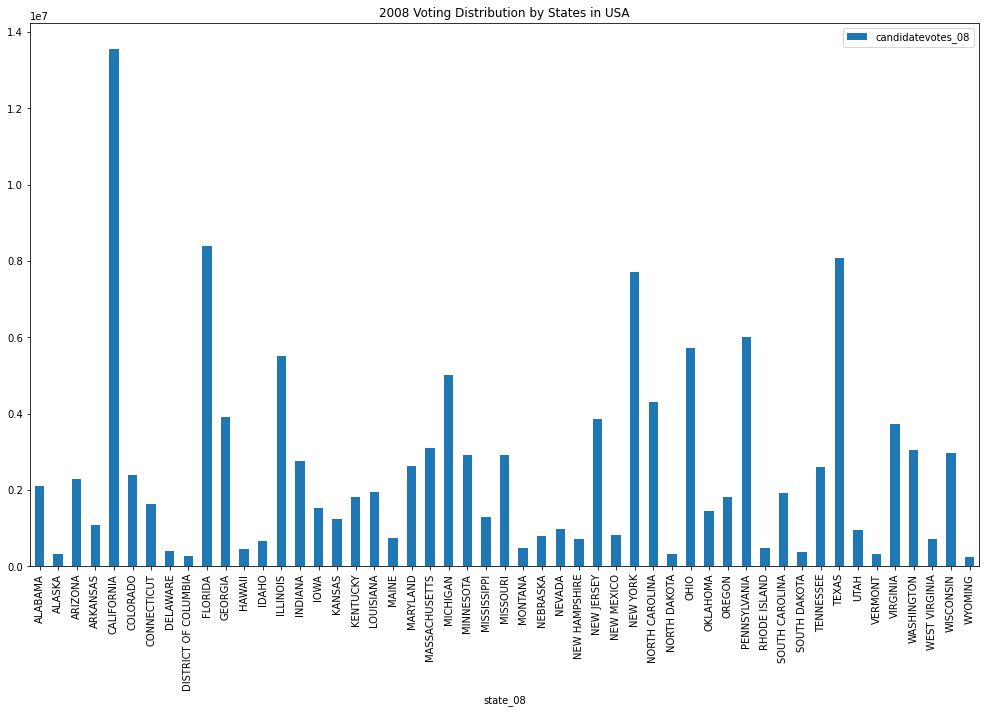

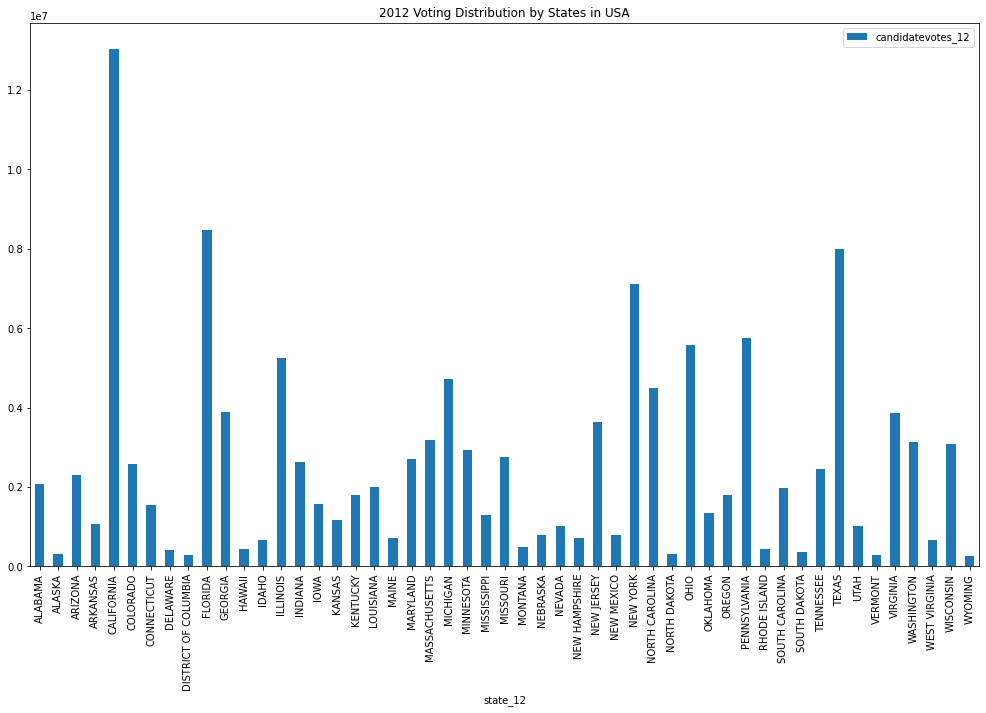

In [ ]:
# Bar Chart and Pie Chart showing the election distribution for 2008
US_Election2008_bar = US_Election2008.groupby("state_08").sum("candidatevotes_08").plot(y= "candidatevotes_08", kind ='bar', figsize= (17, 10), title= "2008 Voting Distribution by States in USA")
US_Election2012_bar = US_Election2012.groupby("state_12").sum("candidatevotes_12").plot(y= "candidatevotes_12", kind ='bar', figsize= (17, 10), title= "2012 Voting Distribution by States in USA")


In [ ]:
# saves bar chart of US_Election2008 and US_Election2012 as an image file.
plt.savefig('US_Election2008_bar')
plt.savefig('US_Election2012_bar')

<Figure size 432x288 with 0 Axes>

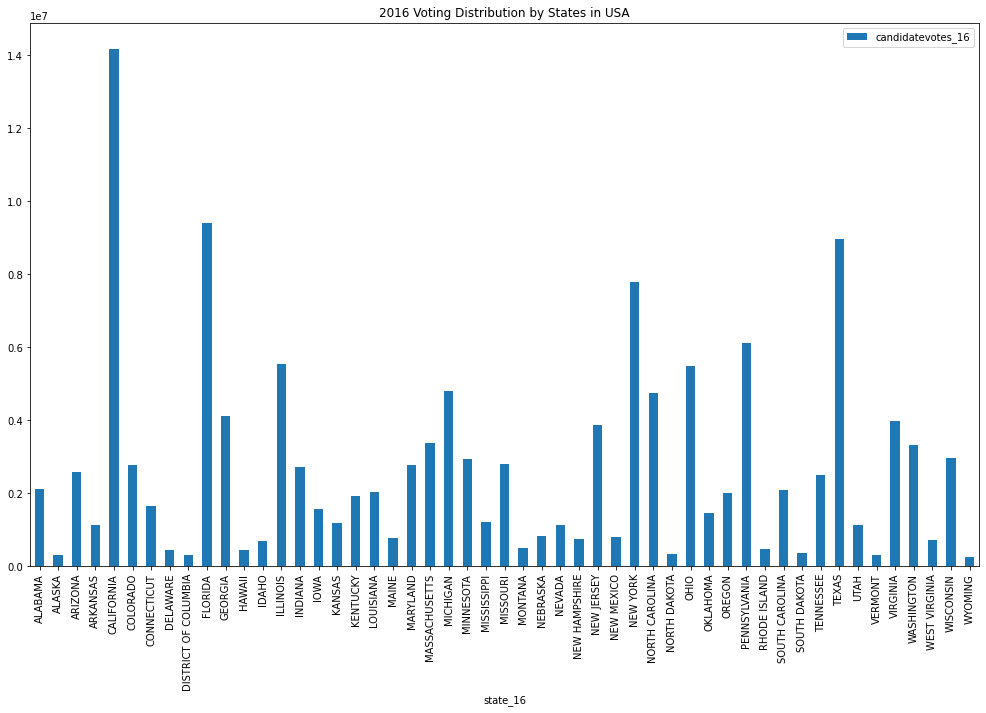

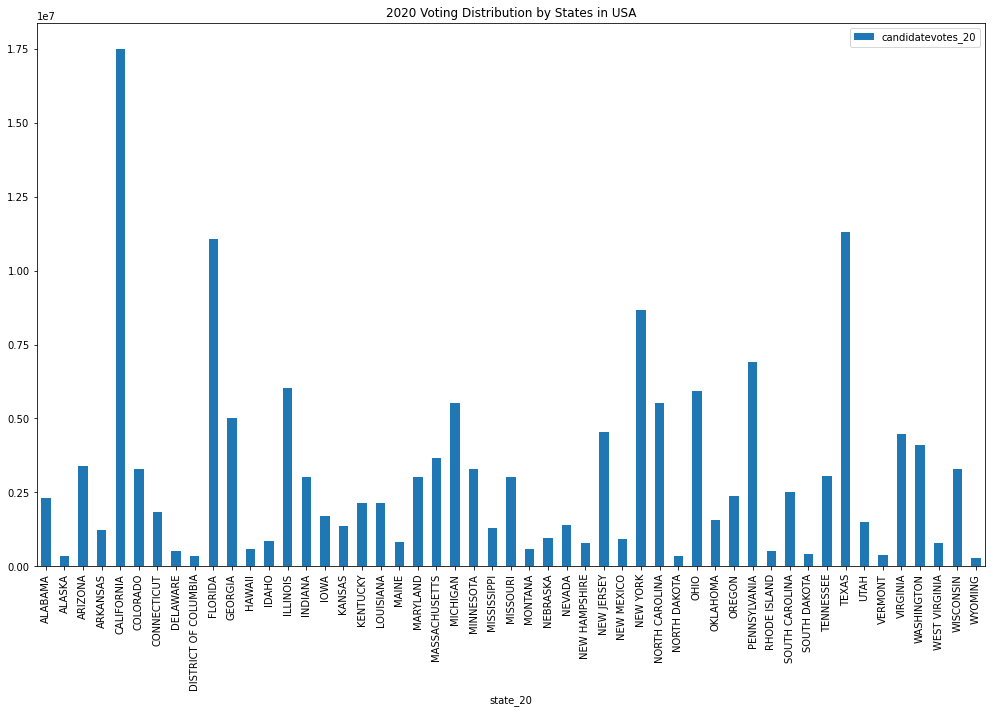

In [ ]:
US_Election2016_bar = US_Election2016.groupby("state_16").sum("candidatevotes_16").plot(y= "candidatevotes_16", kind ='bar', figsize= (17, 10), title= "2016 Voting Distribution by States in USA")
US_Election2020_bar = US_Election2020.groupby("state_20").sum("candidatevotes_20").plot(y= "candidatevotes_20", kind ='bar', figsize= (17, 10), title= "2020 Voting Distribution by States in USA")

In the above bar charts, it can been that California is the city with the highest number of candidatesvote from 2008 till 2020. Florida, Texas, New York, Pennyslvania, Ohio, and Ilinos maintained their rankings as the 2nd, 3rd, 4th , 5th, 6th and 7th state with the highest number of votes in 2008, 2012, 2016, and 2020 elections. However, Texas took over the 2nd position from Florida in the 2020 elections leaving Florida as the 3rd in that year.

In [ ]:
# saves bar chart of US_Election2016 and US_Election2020 as an image file.
plt.savefig('US_Election2016_bar')
plt.savefig('US_Election2020_bar')

<Figure size 432x288 with 0 Axes>

##### PIE CHARTS

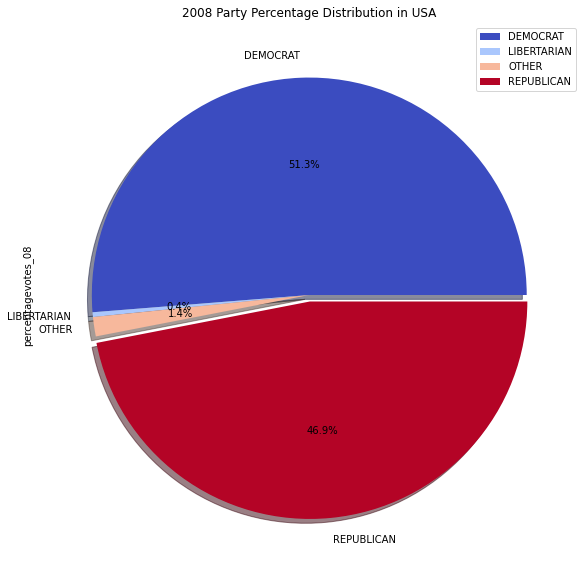

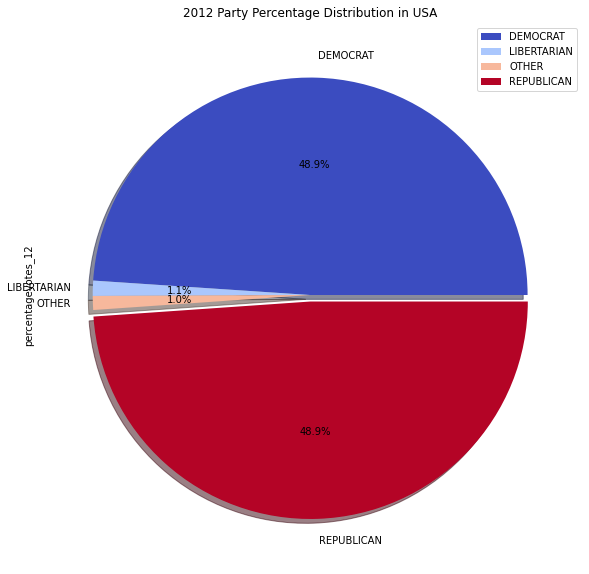

In [ ]:
US_Election2008_pie = US_Election2008.groupby("party_08").sum("percentagevotes_08").plot(y= "percentagevotes_08",  autopct="%1.1f%%", shadow=True, startangle=0, explode = (0, 0, 0, 0.03), kind ='pie', cmap= "coolwarm", figsize= (17, 10), title= "2008 Party Percentage Distribution in USA")
US_Election2012_pie = US_Election2012.groupby("party_12").sum("percentagevotes_12").plot(y= "percentagevotes_12" , autopct="%1.1f%%", shadow=True, startangle=0, explode = (0, 0, 0, 0.03), kind ='pie', cmap= "coolwarm", figsize= (17, 10), title= "2012 Party Percentage Distribution in USA")


In [ ]:
# saves pie chart of US_Election2008 and US_Election2012 as an image file.
plt.savefig('US_Election2008_pie')
plt.savefig('US_Election2012_pie')

<Figure size 432x288 with 0 Axes>

The above figure shows Democrat had a percentagevote of 51.3% in 2008 and 48.9% in 2012 while the Republican had a percentagevote of 46.9% in 2008 and 48.9% in 2012.

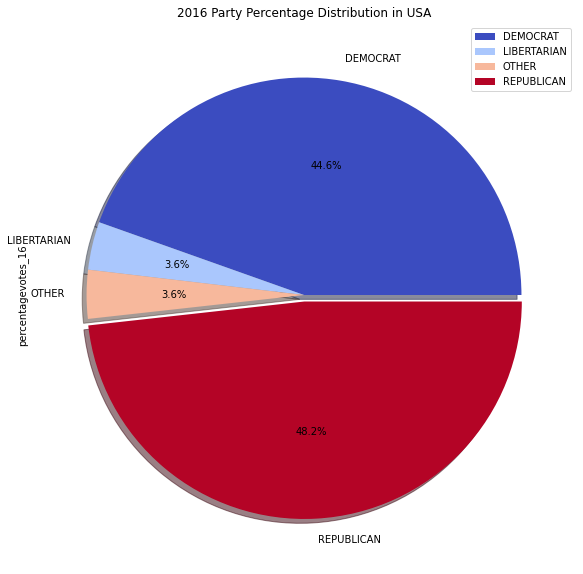

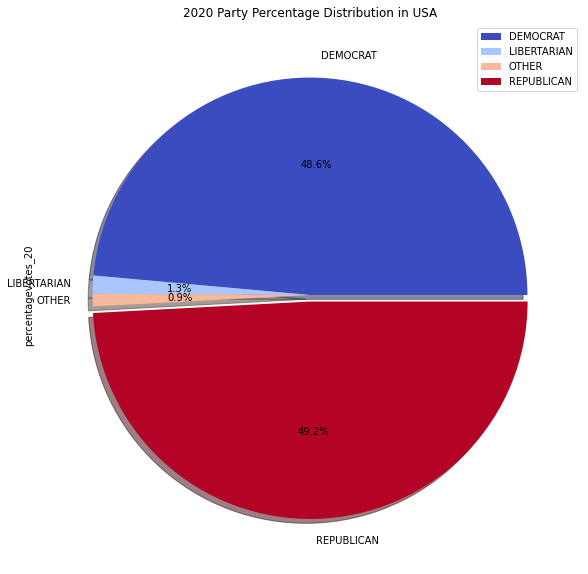

In [ ]:
US_Election2016_pie = US_Election2016.groupby("party_16").sum("percentagevotes_16").plot(y= "percentagevotes_16" , autopct="%1.1f%%", shadow=True, startangle=0, explode = (0, 0, 0, 0.03), kind ='pie', cmap= "coolwarm", figsize= (17, 10), title= "2016 Party Percentage Distribution in USA")
US_Election2020_pie = US_Election2020.groupby("party_20").sum("percentagevotes_20").plot(y= "percentagevotes_20" , autopct="%1.1f%%", shadow=True, startangle=0, explode = (0, 0, 0, 0.03), kind ='pie', cmap= "coolwarm", figsize= (17, 10), title= "2020 Party Percentage Distribution in USA")

In [ ]:
# saves pie chart of US_Election2020 as an image file.
plt.savefig('US_Election2016_pie')
plt.savefig('US_Election2020_pie')

<Figure size 432x288 with 0 Axes>

The above figure shows Democrat had a percentagevote of 44.6% in 2016 and 48.6% in 2020 while the Republican had a percentagevote of 48.2% in 2016 and 49.2% in 2020.

SUMMARY STATISTICS OF VOTES AND PERCENTAGE VOTES FROM 2008 TO 2020.

In [ ]:
US_Election2008.describe()

,year,candidatevotes_08,totalvotes,percentagevotes_08
count,351.0,3.510000e+02,3.510000e+02,351.000000
mean,2008.0,3.744138e+05,2.828162e+06,14.529915
std,0.0,9.082829e+05,2.731759e+06,22.969985
min,2008.0,1.100000e+01,2.549040e+05,0.000199
25%,2008.0,1.687500e+03,8.012810e+05,0.150645
50%,2008.0,8.201000e+03,1.960761e+06,0.450398
75%,2008.0,2.254645e+05,3.723260e+06,37.422116
max,2008.0,8.274473e+06,1.356190e+07,92.457110


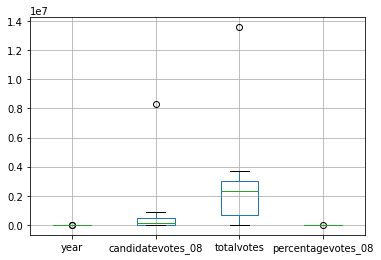

In [ ]:
US_Election2008.describe().boxplot()

In [ ]:
US_Election2012.describe()

,year,candidatevotes_12,totalvotes,percentagevotes_12
count,316.0,3.160000e+02,3.160000e+02,316.000000
mean,2012.0,4.086709e+05,2.783162e+06,16.139241
std,0.0,9.203138e+05,2.679510e+06,23.625811
min,2012.0,3.900000e+01,2.507010e+05,0.000531
25%,2012.0,2.417750e+03,7.837580e+05,0.188843
50%,2012.0,1.220550e+04,1.994065e+06,0.766930
75%,2012.0,2.947272e+05,3.638499e+06,40.389910
max,2012.0,7.854285e+06,1.303855e+07,90.913114


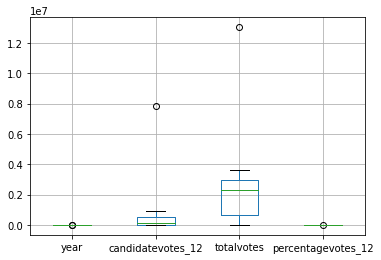

In [ ]:
US_Election2012.describe().boxplot()

In [ ]:
US_Election2016.describe()

,year,candidatevotes_16,totalvotes,percentagevotes_16
count,345.0,3.450000e+02,3.450000e+02,345.000000
mean,2016.0,3.964846e+05,2.729199e+06,14.782609
std,0.0,9.207880e+05,2.663532e+06,21.620542
min,2016.0,1.200000e+01,2.587880e+05,0.000466
25%,2016.0,5.335000e+03,7.718920e+05,0.389193
50%,2016.0,3.187000e+04,2.103027e+06,1.800018
75%,2016.0,2.668910e+05,3.317019e+06,33.698756
max,2016.0,8.753788e+06,1.418160e+07,90.483884


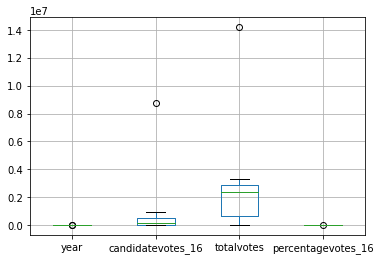

In [ ]:
US_Election2016.describe().boxplot()

In [ ]:
US_Election2020.describe()

,year,candidatevotes_20,totalvotes,percentagevotes_20
count,547.0,5.470000e+02,5.470000e+02,547.000000
mean,2020.0,2.898144e+05,3.411064e+06,9.323583
std,0.0,9.327443e+05,3.419035e+06,19.635601
min,2020.0,0.000000e+00,2.785030e+05,0.000000
25%,2020.0,5.150000e+01,8.680140e+05,0.001801
50%,2020.0,1.640000e+03,2.514096e+06,0.109592
75%,2020.0,2.587450e+04,4.549353e+06,1.080468
max,2020.0,1.111025e+07,1.750088e+07,92.149694


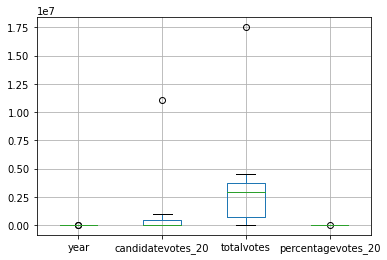

In [ ]:
US_Election2020.describe().boxplot()

##### **5.5. Determining States that consistently voted for The Two major Parties (Democrat and the Republican) in the last three consecutive election years (2012, 2016, and 2020)**

We determined states that have been consistent with voting for a particular party (e.g. Democrat and Republican) in the last 3 consecutive elections by merging the three dataframes on a common column (e.g. state_po).



##### **5.5.1. Merging the three (3) dataframes**

In [ ]:
# Merged dataframe of 2012, 2016, and 2020 election dataset
US_Election_2012_2016_2020 = US_Election_2012.merge(US_Election2016, on= ["state_po"]) \
        .merge(US_Election2020, on= "state_po")
US_Election_2012_2016_2020.head(2)

,year_x,state,state_po,candidate_x,candidatevotes,totalvotes_x,party,percentage,decision_x,year_y,...,percentagevotes_16,decision_y,year,state_20,candidate,candidatevotes_20,totalvotes,party_20,percentagevotes_20,decision
0,2012,ALABAMA,AL,"ROMNEY, MITT",1255925,2074338,REPUBLICAN,60.545822,WON,2016,...,62.083092,WON,2020,ALABAMA,"BIDEN, JOSEPH R. JR",849624,2323282,DEMOCRAT,36.569990,LOST
1,2012,ALABAMA,AL,"ROMNEY, MITT",1255925,2074338,REPUBLICAN,60.545822,WON,2016,...,62.083092,WON,2020,ALABAMA,"TRUMP, DONALD J.",1441170,2323282,REPUBLICAN,62.031643,WON


In [ ]:
# reading the column values of the merged dataset
US_Election_2012_2016_2020.columns.values

array(['year_x', 'state', 'state_po', 'candidate_x', 'candidatevotes',
       'totalvotes_x', 'party', 'percentage', 'decision_x', 'year_y',
       'state_16', 'candidate_y', 'candidatevotes_16', 'totalvotes_y',
       'party_16', 'percentagevotes_16', 'decision_y', 'year', 'state_20',
       'candidate', 'candidatevotes_20', 'totalvotes', 'party_20',
       'percentagevotes_20', 'decision'], dtype=object)

##### **5.5.2. Determining states that consistently voted Republican in the last three consecutive elections.**

In [ ]:
# Republican dataframe for the consequtive three years votes
Republican = US_Election_2012_2016_2020[(US_Election_2012_2016_2020["decision"] == "WON") & (US_Election_2012_2016_2020["party"] == "REPUBLICAN")&
                           (US_Election_2012_2016_2020["decision_x"] == "WON") & (US_Election_2012_2016_2020["party_16"] == "REPUBLICAN")&
                           (US_Election_2012_2016_2020["decision_y"] == "WON") & (US_Election_2012_2016_2020["party_20"] == "REPUBLICAN")]

In [ ]:
# shows the first five rows of the dataframe
Republican.head()

,year_x,state,state_po,candidate_x,candidatevotes,totalvotes_x,party,percentage,decision_x,year_y,...,percentagevotes_16,decision_y,year,state_20,candidate,candidatevotes_20,totalvotes,party_20,percentagevotes_20,decision
1,2012,ALABAMA,AL,"ROMNEY, MITT",1255925,2074338,REPUBLICAN,60.545822,WON,2016,...,62.083092,WON,2020,ALABAMA,"TRUMP, DONALD J.",1441170,2323282,REPUBLICAN,62.031643,WON
81,2012,ALASKA,AK,"ROMNEY, MITT",164676,300495,REPUBLICAN,54.801577,WON,2016,...,51.281512,WON,2020,ALASKA,"TRUMP, DONALD J.",189951,359530,REPUBLICAN,52.833143,WON
771,2012,ARKANSAS,AR,"ROMNEY, MITT",647744,1069468,REPUBLICAN,60.566936,WON,2016,...,60.574102,WON,2020,ARKANSAS,"TRUMP, DONALD J.",760647,1219069,REPUBLICAN,62.395730,WON
11781,2012,IDAHO,ID,"ROMNEY, MITT",420911,652274,REPUBLICAN,64.529783,WON,2016,...,59.261432,WON,2020,IDAHO,"TRUMP, DONALD J.",554119,868014,REPUBLICAN,63.837565,WON
12656,2012,INDIANA,IN,"ROMNEY, MITT",1420543,2624534,REPUBLICAN,54.125532,WON,2016,...,56.940033,WON,2020,INDIANA,"TRUMP, DONALD J.",1729519,3033118,REPUBLICAN,57.021158,WON


##### **5.5.3. Determining states that consistently voted Democrats in the last three consecutive elections.**

In [ ]:
# Democrat dataframe for the consequtive three years votes
Democrat = US_Election_2012_2016_2020[(US_Election_2012_2016_2020["decision"] == "WON") & (US_Election_2012_2016_2020["party"] == "DEMOCRAT")&
                           (US_Election_2012_2016_2020["decision_x"] == "WON") & (US_Election_2012_2016_2020["party_16"] == "DEMOCRAT")&
                           (US_Election_2012_2016_2020["decision_y"] == "WON") & (US_Election_2012_2016_2020["party_20"] == "DEMOCRAT")]

In [ ]:
# shows the first five rows of the dataframe
Democrat.head()

,year_x,state,state_po,candidate_x,candidatevotes,totalvotes_x,party,percentage,decision_x,year_y,...,percentagevotes_16,decision_y,year,state_20,candidate,candidatevotes_20,totalvotes,party_20,percentagevotes_20,decision
1280,2012,CALIFORNIA,CA,"OBAMA, BARACK H.",7854285,13038547,DEMOCRAT,60.238959,WON,2016,...,61.726400,WON,2020,CALIFORNIA,"BIDEN, JOSEPH R. JR",11110250,17500881,DEMOCRAT,63.483947,WON
9102,2012,CONNECTICUT,CT,"OBAMA, BARACK H.",905083,1558204,DEMOCRAT,58.085013,WON,2016,...,54.566301,WON,2020,CONNECTICUT,"BIDEN, JOSEPH R. JR",1080831,1823857,DEMOCRAT,59.260732,WON
9469,2012,DELAWARE,DE,"OBAMA, BARACK H.",242584,413890,DEMOCRAT,58.610742,WON,2016,...,53.353337,WON,2020,DELAWARE,"BIDEN, JOSEPH R. JR",296268,504346,DEMOCRAT,58.743006,WON
9788,2012,DISTRICT OF COLUMBIA,DC,"OBAMA, BARACK H.",267070,293764,DEMOCRAT,90.913114,WON,2016,...,90.483884,WON,2020,DISTRICT OF COLUMBIA,"BIDEN, JOSEPH R. JR",317323,344356,DEMOCRAT,92.149694,WON
11444,2012,HAWAII,HI,"OBAMA, BARACK H.",306658,437159,DEMOCRAT,70.147932,WON,2016,...,60.980798,WON,2020,HAWAII,"BIDEN, JOSEPH R. JR",366130,579784,DEMOCRAT,63.149380,WON



EXTRACTING WORLD GEOMETRY DATASET FROM

In [ ]:
%%time
# Geopandas dependences
!pip install fiona shapely pyproj rtree descartes mapclassify
!pip install --upgrade geopandas
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.6 MB 22.9 MB/s 
     |████████████████████████████████| 7.8 MB 50.9 MB/s 
     |████████████████████████████████| 1.0 MB 56.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 28.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
CPU times: user 226 ms, sys: 69.9 ms, total: 296 ms
Wall time: 16.1 s


In [ ]:
import geopandas as gpd
import shapely.geometry
import seaborn as sns

##### **5.6. Downloading and Reading the Spatial data**

We use the [states_provinces data (Admin1) at 1:50m scale (cultural)](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip)as the administrative boudary layer or geometry data.

In [ ]:
!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip

--2022-12-11 10:28:10--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces.zip [following]
--2022-12-11 10:28:10--  https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces.zip
Resolving naciscdn.org (naciscdn.org)... 18.160.46.63, 18.160.46.110, 18.160.46.106, ...
Connecting to naciscdn.org (naciscdn.org)|18.160.46.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 911408 (890K) [application/zip]
Saving to: ‘ne_50m_admin_1_states_provinces.zip’

ne_50m_admin_1_stat 100%[===================>] 890.05K  --.-KB/s    in 0.04s   

2022-12-11 10:28:10 (

In [ ]:
!unzip ne_50m_admin_1_states_provinces.zip

Archive:  ne_50m_admin_1_states_provinces.zip
  inflating: ne_50m_admin_1_states_provinces.README.html  
 extracting: ne_50m_admin_1_states_provinces.VERSION.txt  
 extracting: ne_50m_admin_1_states_provinces.cpg  
  inflating: ne_50m_admin_1_states_provinces.dbf  
  inflating: ne_50m_admin_1_states_provinces.prj  
  inflating: ne_50m_admin_1_states_provinces.shp  
  inflating: ne_50m_admin_1_states_provinces.shx  


In [ ]:
!ls

drive					     US_Election_2008.csv
ne_50m_admin_1_states_provinces.cpg	     US_Election2008_pie.png
ne_50m_admin_1_states_provinces.dbf	     US_Election2012_bar.png
ne_50m_admin_1_states_provinces.prj	     US_Election_2012.csv
ne_50m_admin_1_states_provinces.README.html  US_Election2012_pie.png
ne_50m_admin_1_states_provinces.shp	     US_Election2016_bar.png
ne_50m_admin_1_states_provinces.shx	     US_Election_2016.csv
ne_50m_admin_1_states_provinces.VERSION.txt  US_Election2016_pie.png
ne_50m_admin_1_states_provinces.zip	     US_Election2020_bar.png
sample_data				     US_Election_2020.csv
US_Election2008_bar.png			     US_Election2020_pie.png


In [ ]:
# read the .SHP file
world = gpd.read_file('ne_50m_admin_1_states_provinces.shp')
world.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,AUS-2651,2651,AU-WA,None,AU,6,Western Australia,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.13181 -25.95199, 113.14823..."
1,Admin-1 scale rank,2,AUS-2650,2650,AU-NT,None,AU,6,Northern Territory,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((129.00196 -25.99901, 129.00196..."


In [ ]:
# checks the column values of the world dataset
world.columns.values

array(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt', 'name_local',
       'type', 'type_en', 'code_local', 'code_hasc', 'note', 'hasc_maybe',
       'region', 'region_cod', 'provnum_ne', 'gadm_level', 'check_me',
       'datarank', 'abbrev', 'postal', 'area_sqkm', 'sameascity',
       'labelrank', 'name_len', 'mapcolor9', 'mapcolor13', 'fips',
       'fips_alt', 'woe_id', 'woe_label', 'woe_name', 'latitude',
       'longitude', 'sov_a3', 'adm0_a3', 'adm0_label', 'admin',
       'geonunit', 'gu_a3', 'gn_id', 'gn_name', 'gns_id', 'gns_name',
       'gn_level', 'gn_region', 'gn_a1_code', 'region_sub', 'sub_code',
       'gns_level', 'gns_lang', 'gns_adm1', 'gns_region', 'min_label',
       'max_label', 'min_zoom', 'wikidataid', 'name_ar', 'name_bn',
       'name_de', 'name_en', 'name_es', 'name_fr', 'name_el', 'name_hi',
       'name_hu', 'name_id', 'name_it', 'name_ja', 'name_ko', 'name_nl',
       'name_pl',

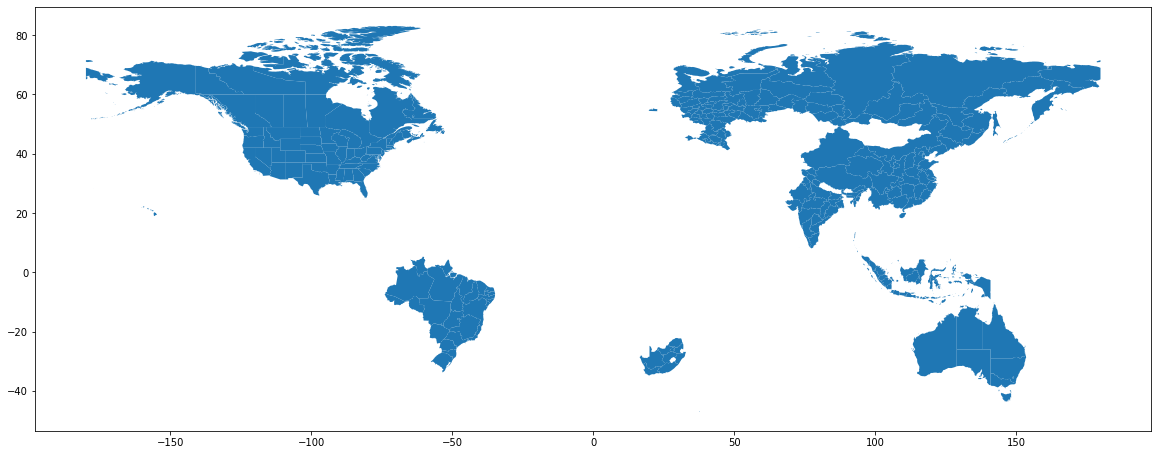

In [ ]:
# plotting the world data
world.plot(figsize= (20,10))

In [ ]:
# saving the world data as an image file
plt.savefig('world_Map.jpg')

<Figure size 432x288 with 0 Axes>

##### **5.7. Extracting data of US from the world data**

In [ ]:
# filter US from the world data
US = world[world["iso_a2"] == "US"]
US.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
49,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434..."
50,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-87.48951 30.37768, -87.51325 ..."


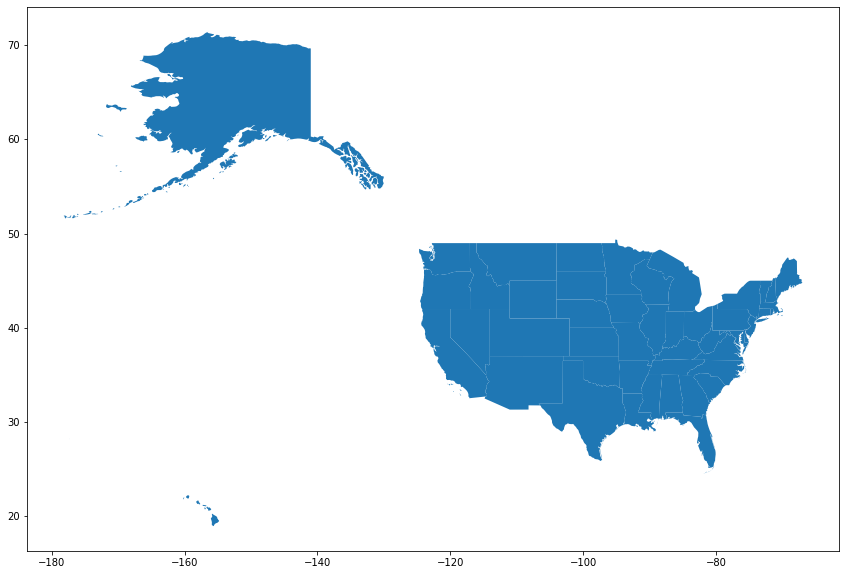

In [ ]:
# plot or visualize the US data
US.plot(figsize = (20,10))

In [ ]:
# save the US data as an image file
plt.savefig('US_Map.jpg')

<Figure size 432x288 with 0 Axes>

##### **5.8. Creating new column to serve as the primary/foreign key for joining the spatial and non-spatial data**

We created a new column (state_po) in the US geometry data to store the first two characters in the column *name_alt* which is later used as the primary key for joining the spatial data with the existing non-spatial election dataset. In this case the state_po column of the US geometry table is the primary key while the state_po of the election data set is the foreign key refenece it.

In [ ]:
# string indexing to extract the state alias
US["state_po"] = US["name_alt"].str[0:2]
US.head(2)

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,state_po
49,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK
50,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-87.48951 30.37768, -87.51325 ...",AL


##### 5.9. MERGING SPATIAL AND NON-SPATIAL DATA

In [ ]:
# Merging the 2008 spatial and non-spatial data
US_2008 = US.merge(US_Election_2008, on= "state_po")
US_2008.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state,candidate,candidatevotes,totalvotes,party,percentage,decision
0,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2008,ALASKA,"MCCAIN, JOHN",193841,326197,REPUBLICAN,59.424520,WON
1,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2008,ALASKA,"OBAMA, BARACK H.",123594,326197,DEMOCRAT,37.889374,LOST


In [ ]:
# Merging the 2012 spatial and non-spatial data
US_2012 = US.merge(US_Election2012, on= "state_po")
US_2012.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state_12,candidate,candidatevotes_12,totalvotes,party_12,percentagevotes_12,decision
0,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2012,ALASKA,"ROMNEY, MITT",164676,300495,REPUBLICAN,54.801577,WON
1,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2012,ALASKA,"OBAMA, BARACK H.",122640,300495,DEMOCRAT,40.812659,LOST


In [ ]:
# Merging the 2016 spatial and non-spatial data
US_2016 = US.merge(US_Election2016, on= "state_po")
US_2016.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state_16,candidate,candidatevotes_16,totalvotes,party_16,percentagevotes_16,decision
0,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2016,ALASKA,"TRUMP, DONALD J.",163387,318608,REPUBLICAN,51.281512,WON
1,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2016,ALASKA,"CLINTON, HILLARY",116454,318608,DEMOCRAT,36.550871,LOST


In [ ]:
# Merging the 2020 spatial and non-spatial data
US_2020 = US.merge(US_Election_2020, on= "state_po")
US_2020.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state,candidate,candidatevotes,totalvotes,party,percentage,decision
0,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2020,ALASKA,"BIDEN, JOSEPH R. JR",153778,359530,DEMOCRAT,42.771952,LOST
1,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2020,ALASKA,"TRUMP, DONALD J.",189951,359530,REPUBLICAN,52.833143,WON


##### 5.10. WINNERS and LOSERS MAP

##### 5.10.1. WINNERS 2008, 2012, 2016, 2020

In [ ]:
# 2008 election winners by state
Won_Elections_2008 = US_2008[US_2008["decision"] == "WON"]
Won_Elections_2008.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state,candidate,candidatevotes,totalvotes,party,percentage,decision
0,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2008,ALASKA,"MCCAIN, JOHN",193841,326197,REPUBLICAN,59.424520,WON
6,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,"MULTIPOLYGON (((-87.48951 30.37768, -87.51325 ...",AL,2008,ALABAMA,"MCCAIN, JOHN",1266546,2099819,REPUBLICAN,60.316913,WON


Text(0.5, 1.0, 'Map showing states where parties won the election in 2008')

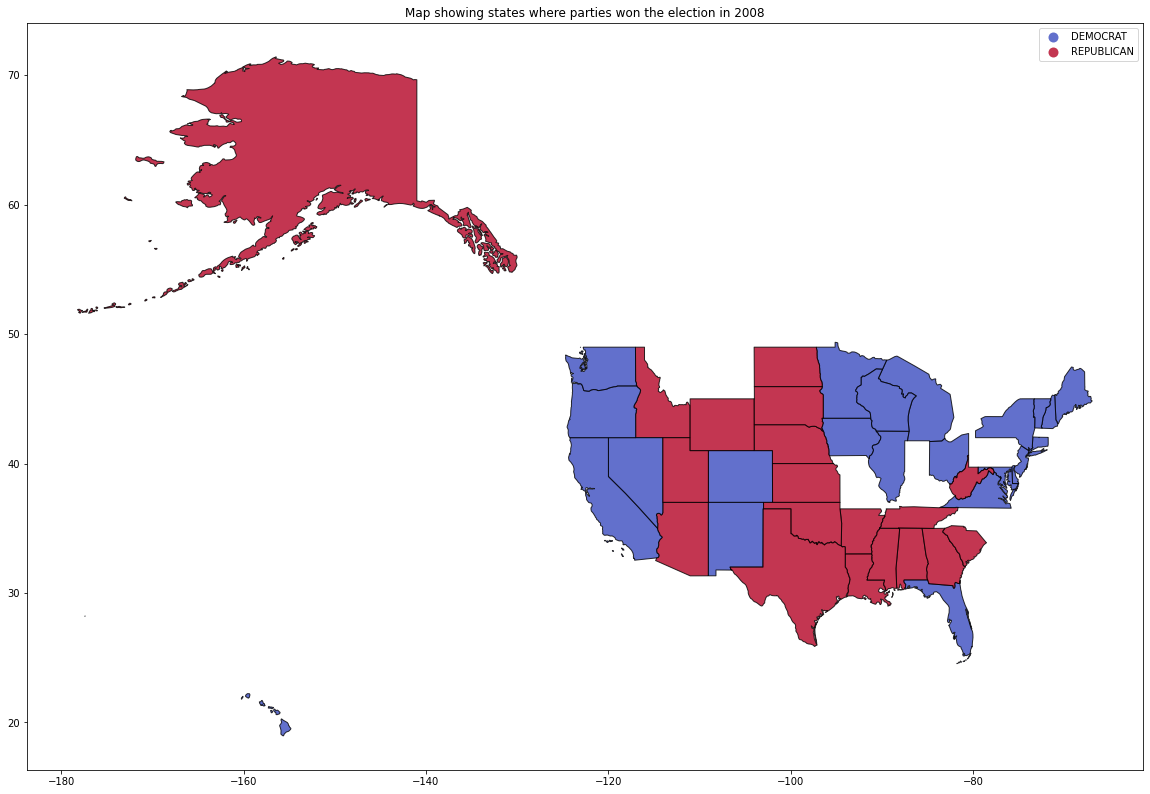

In [ ]:
# Plot of the 2008 election winners by state
Won_Elections_2008.plot(column= "party", legend=True, figsize=(20,15), cmap= "coolwarm", edgecolor='k', alpha=0.8)
plt.title("Map showing states where parties won the election in 2008")

In [ ]:
# saved image file for 2008 election winners by state
plt.savefig('Won_Elections_2008.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
# 2012 election winners by state
Won_Elections_2012 = US_2012[US_2012["decision"] == "WON"]
Won_Elections_2012.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state_12,candidate,candidatevotes_12,totalvotes,party_12,percentagevotes_12,decision
0,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2012,ALASKA,"ROMNEY, MITT",164676,300495,REPUBLICAN,54.801577,WON
5,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,"MULTIPOLYGON (((-87.48951 30.37768, -87.51325 ...",AL,2012,ALABAMA,"ROMNEY, MITT",1255925,2074338,REPUBLICAN,60.545822,WON


Text(0.5, 1.0, 'Map showing states where parties won the election in 2012')

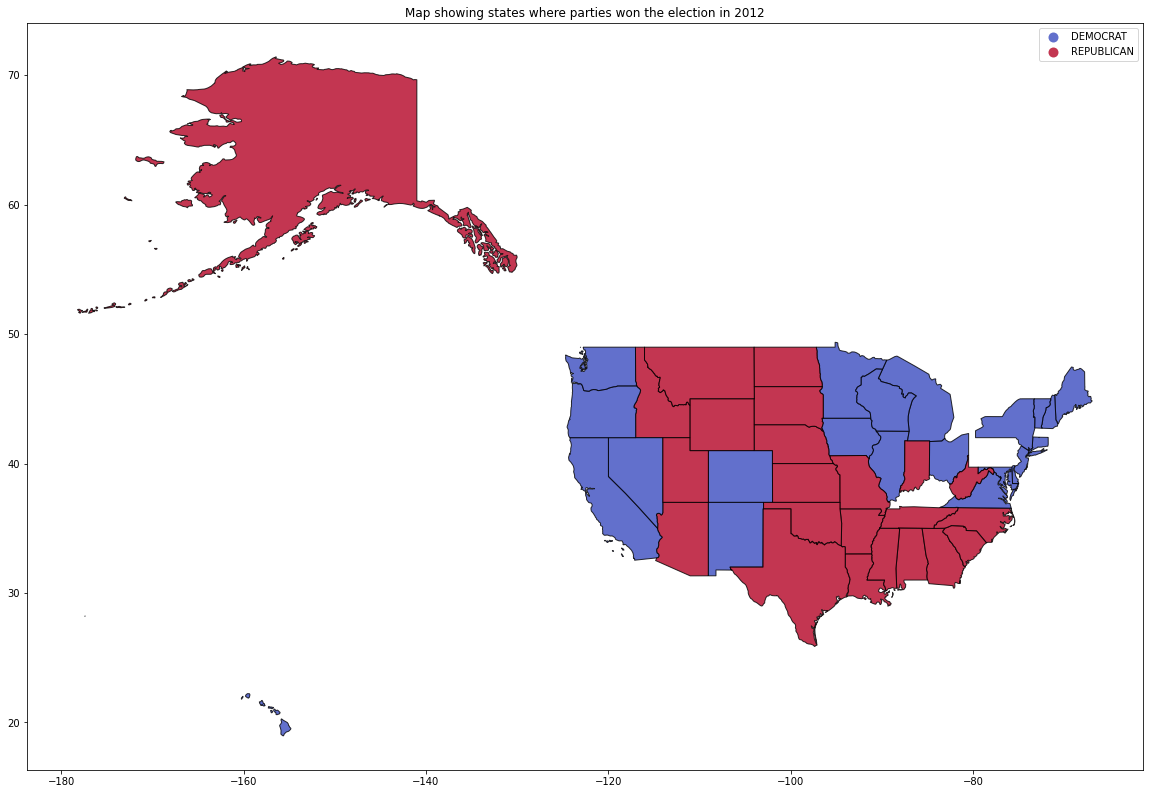

In [ ]:
# Plot of the 2012 election winners by state
Won_Elections_2012.plot(column= "party_12", legend=True, figsize=(20,15), cmap= "coolwarm", edgecolor='k', alpha=0.8)
plt.title("Map showing states where parties won the election in 2012")

In [ ]:
# saved image file for 2012 election winners by state
plt.savefig('Won_Elections_2012.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
# 2016 election winners by state
Won_Elections_2016 = US_2016[US_2016["decision"] == "WON"]
Won_Elections_2016.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state_16,candidate,candidatevotes_16,totalvotes,party_16,percentagevotes_16,decision
0,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2016,ALASKA,"TRUMP, DONALD J.",163387,318608,REPUBLICAN,51.281512,WON
7,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,"MULTIPOLYGON (((-87.48951 30.37768, -87.51325 ...",AL,2016,ALABAMA,"TRUMP, DONALD J.",1318255,2123372,REPUBLICAN,62.083092,WON


Text(0.5, 1.0, 'Map showing states where parties won the election in 2016')

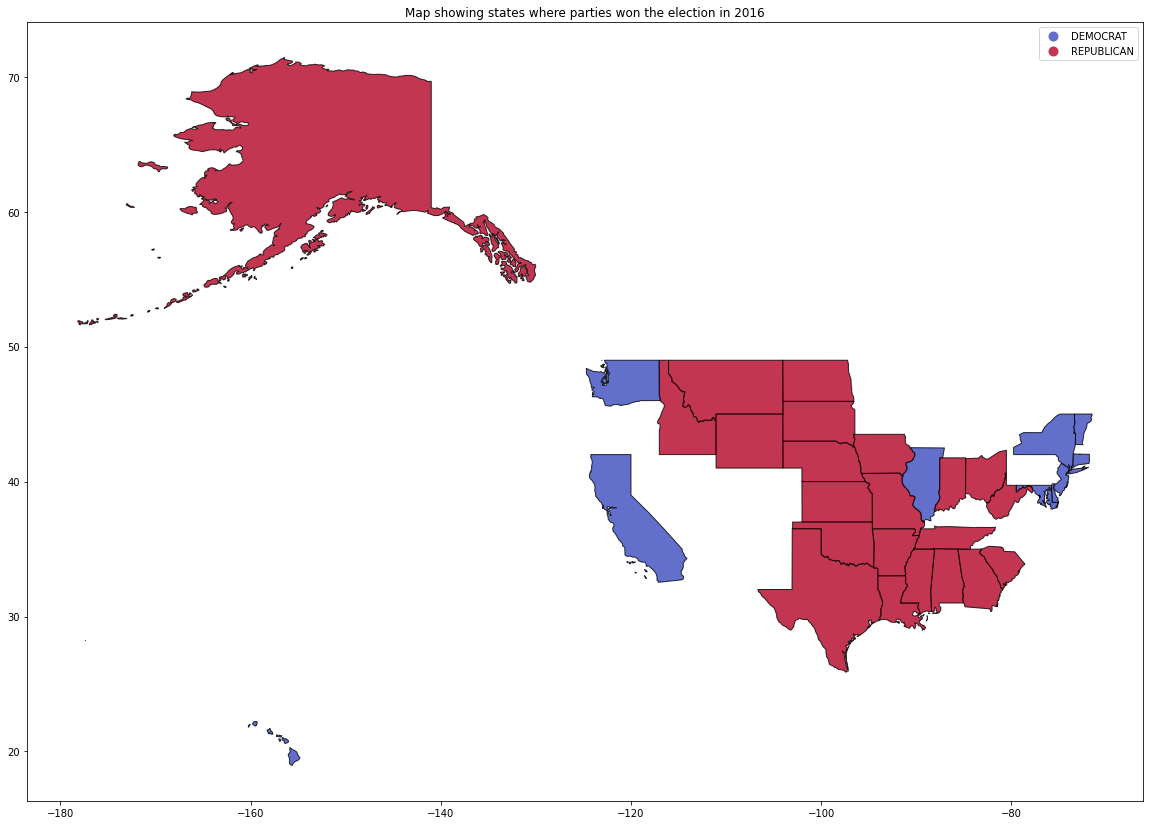

In [ ]:
# Plot of the 2016 election winners by state
Won_Elections_2016.plot(column= "party_16", legend=True, figsize=(20,15), cmap= "coolwarm", edgecolor='k', alpha=0.8)
plt.title("Map showing states where parties won the election in 2016")

In [ ]:
# saved image file for 2016 election winners by state
plt.savefig('Won_Elections_2016.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
# 2020 election winners by state
Won_Elections_2020 = US_2020[US_2020["decision"] == "WON"]
Won_Elections_2020.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state,candidate,candidatevotes,totalvotes,party,percentage,decision
1,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2020,ALASKA,"TRUMP, DONALD J.",189951,359530,REPUBLICAN,52.833143,WON
9,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,"MULTIPOLYGON (((-87.48951 30.37768, -87.51325 ...",AL,2020,ALABAMA,"TRUMP, DONALD J.",1441170,2323282,REPUBLICAN,62.031643,WON


Text(0.5, 1.0, 'Map showing states where parties won the election in 2020')

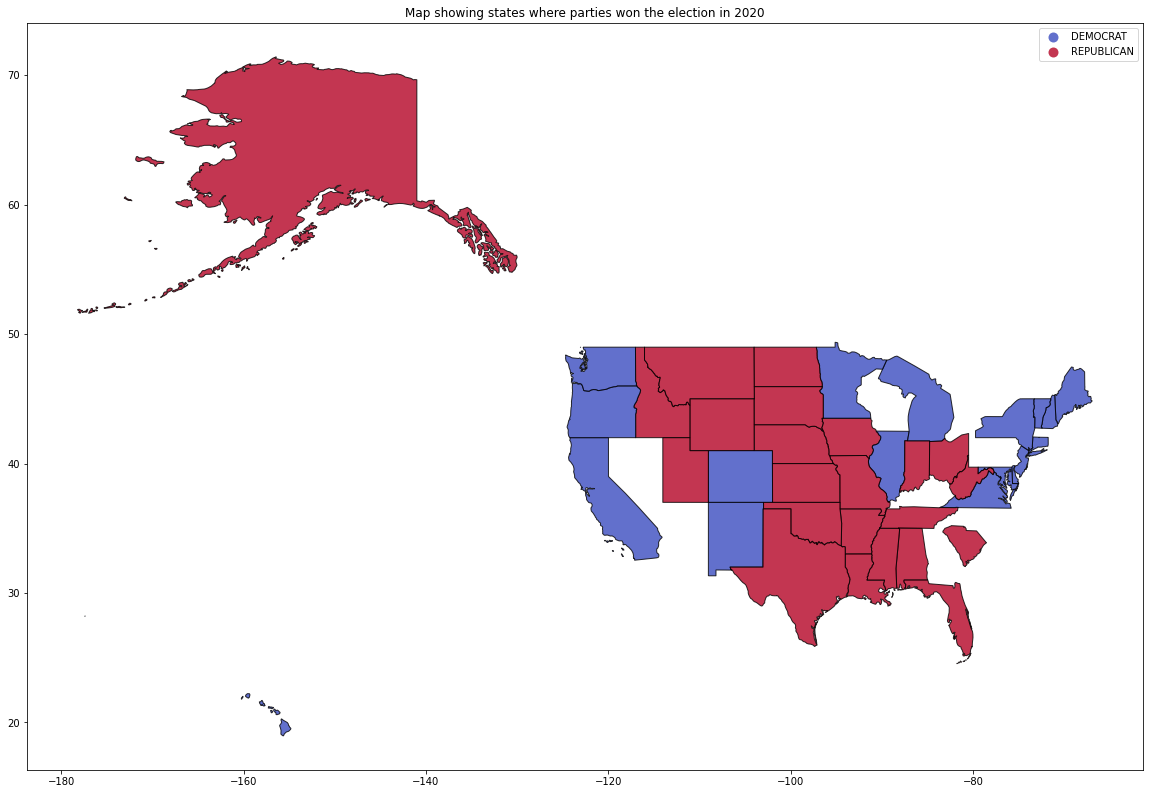

In [ ]:
# Plot of the 2020 election winners by state
Won_Elections_2020.plot(column= "party", legend=True, figsize=(20,15), cmap= "coolwarm", edgecolor='k', alpha=0.8)
plt.title("Map showing states where parties won the election in 2020")

In [ ]:
# saved image file for 2020 election winners by state
plt.savefig('Won_Elections_2020.jpg')

<Figure size 432x288 with 0 Axes>

##### 5.10.2. LOSERS OF ELECTION 2008, 2012, 2016, AND 2020

In [ ]:
# 2008 election losers by state
Lost_Election_2008 = US_2008[US_2008["decision"] == "LOST"]
Lost_Election_2008.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state,candidate,candidatevotes,totalvotes,party,percentage,decision
1,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2008,ALASKA,"OBAMA, BARACK H.",123594,326197,DEMOCRAT,37.889374,LOST
2,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2008,ALASKA,"NADER, RALPH",3783,326197,OTHER,1.159729,LOST


Text(0.5, 1.0, 'Map showing states where parties lost election in 2008')

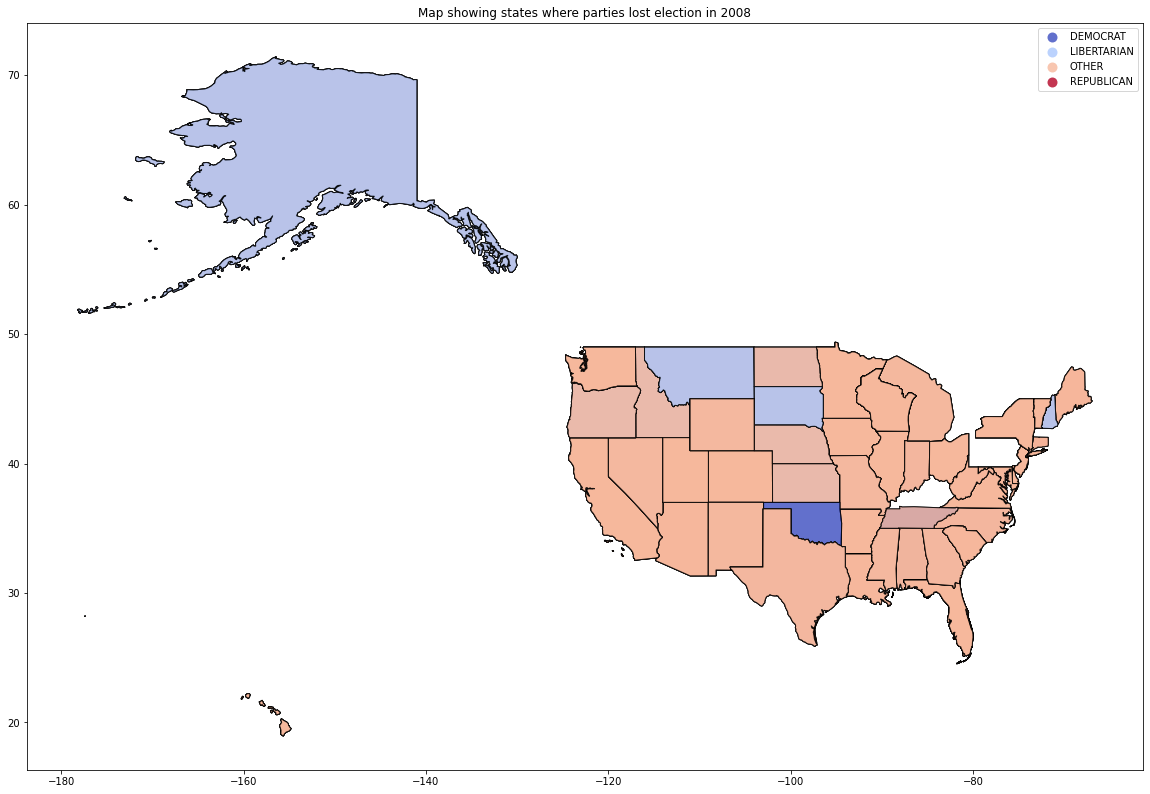

In [ ]:
# Plot of the 2008 election losers by state
Lost_Election_2008.plot(column= "party", legend=True, figsize=(20,15), cmap= "coolwarm", edgecolor='k', alpha=0.8)
plt.title("Map showing states where parties lost election in 2008")

In [ ]:
# saved image file for 2008 election losers by state
plt.savefig('lost_Elections_2008.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
# 2012 election losers by state
Lost_Election_2012 = US_2012[US_2012["decision"] == "LOST"]
Lost_Election_2012.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state_12,candidate,candidatevotes_12,totalvotes,party_12,percentagevotes_12,decision
1,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2012,ALASKA,"OBAMA, BARACK H.",122640,300495,DEMOCRAT,40.812659,LOST
2,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2012,ALASKA,"JOHNSON, GARY",7392,300495,LIBERTARIAN,2.459941,LOST


Text(0.5, 1.0, 'Map showing states where parties lost election in 2012')

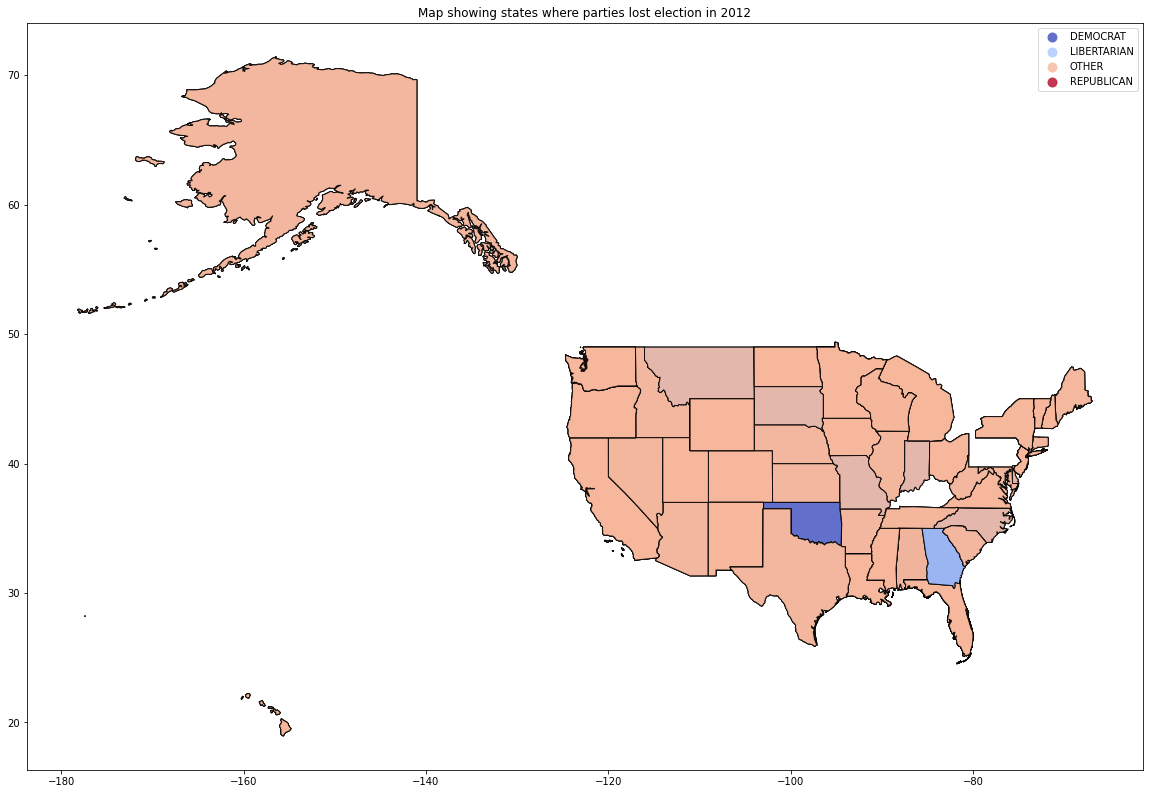

In [ ]:
# Plot of the 2012 election losers by state
Lost_Election_2012.plot(column= "party_12", legend=True, figsize=(20,15), cmap= "coolwarm", edgecolor='k', alpha=0.8)
plt.title("Map showing states where parties lost election in 2012")

In [ ]:
# saved image file for 2012 election losers by state
plt.savefig('lost_Elections_2012.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
# 2016 election losers by state
Lost_Election_2016 = US_2016[US_2016["decision"] == "LOST"]
Lost_Election_2016.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state_16,candidate,candidatevotes_16,totalvotes,party_16,percentagevotes_16,decision
1,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2016,ALASKA,"CLINTON, HILLARY",116454,318608,DEMOCRAT,36.550871,LOST
2,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2016,ALASKA,"JOHNSON, GARY",18725,318608,LIBERTARIAN,5.877128,LOST


Text(0.5, 1.0, 'Map showing states where parties lost election in 2016')

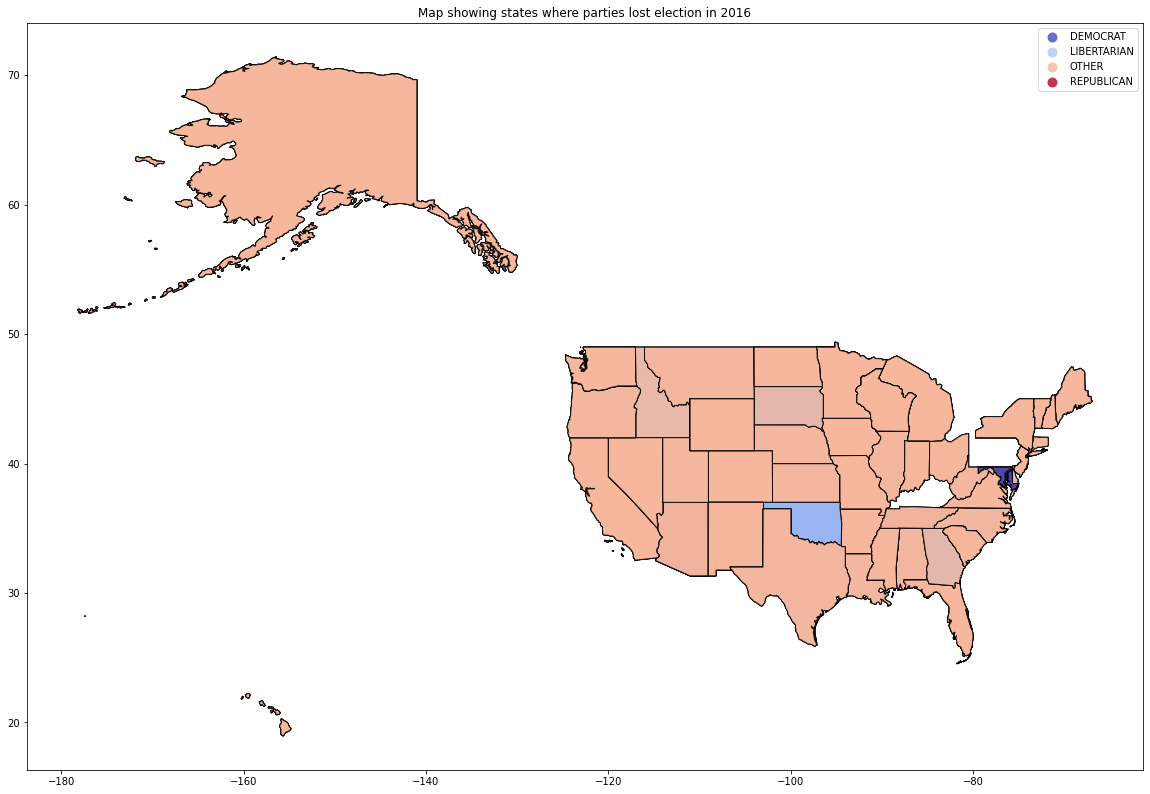

In [ ]:
# Plot of the 2012 election losers by state
Lost_Election_2016.plot(column= "party_16", legend=True, figsize=(20,15), cmap= "coolwarm", edgecolor='k', alpha=0.8)
plt.title("Map showing states where parties lost election in 2016")

In [ ]:
# saved image file for 2016 election losers by state
plt.savefig('lost_Elections_2016.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
# 2020 election losers by state
Lost_Election_2020 = US_2020[US_2020["decision"] == "LOST"]
Lost_Election_2020.head(2)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,geometry,state_po,year,state,candidate,candidatevotes,totalvotes,party,percentage,decision
0,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2020,ALASKA,"BIDEN, JOSEPH R. JR",153778,359530,DEMOCRAT,42.771952,LOST
2,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,"MULTIPOLYGON (((-139.05652 60.00158, -139.0434...",AK,2020,ALASKA,"JORGENSEN, JO",8897,359530,LIBERTARIAN,2.474620,LOST


Text(0.5, 1.0, 'Map showing states where parties lost election in 2020')

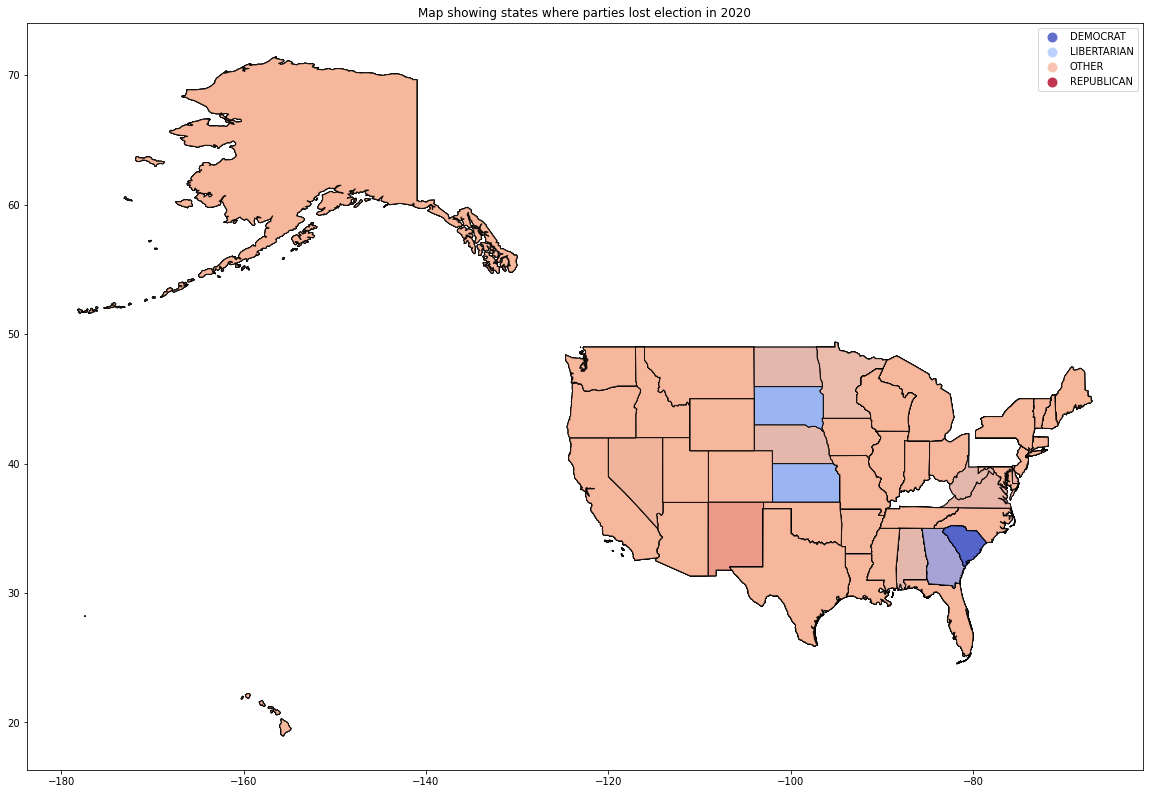

In [ ]:
# Plot of the 2020 election losers by state
Lost_Election_2020.plot(column= "party", legend=True, figsize=(20,15), cmap= "coolwarm", edgecolor='k', alpha=0.8)
plt.title("Map showing states where parties lost election in 2020")

In [ ]:
# Plot of the 2020 election losers by state
plt.savefig('lost_Elections_2020.jpg')

<Figure size 432x288 with 0 Axes>

##### 5.10.3. DIRECTION OF WINNING IN 2020




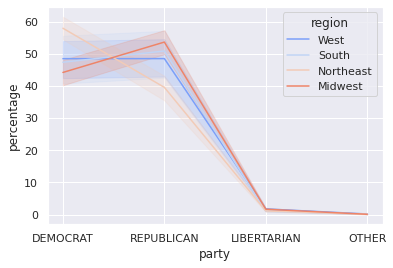

In [ ]:
sns.set_theme(style="darkgrid")
sns.lineplot(data= US_2020, y= "percentage", x= "party", hue= "region", palette= "coolwarm")

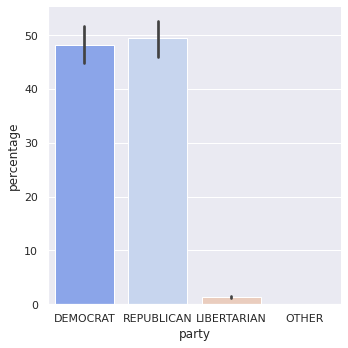

In [ ]:
sns.catplot(data= US_2020, x= "party", y= "percentage", kind= "bar", palette= "coolwarm")

##### **6.0. Final reflections**
##### SUMMARY
The election data analysis determined voting pattern, voting behaviour, percentage change in total votes and political party voting progress.

The final result of the analysis showed that the 20-states (e.g. ALABAMA ALASKA, IDAHO INDIANA KANSAS KENTUCKY, LOUISIANA, MISSISSIPPI, MISSOURI, MONTANA, NEBRASKA, NORTH DAKOTA, OKLAHOMA, SOUTH CAROLINA , SOUTH DAKOTA, TENNESSEE , TEXAS, WEST VIRGINIA, WYOMING) voted consistently for the REBUBLICANS in 2012, 2016 and 2020. This voting behavior can be seen as a dividend of good governance enjoyed by the resident of the listed states. The states can be classified as strongholds to success by the Democrat and can be a strategic data for planning by the Democrat future elections.



The final analysis showed that the 13 states (e.g. CALIFORNIA, CONNECTICUT, DELAWARE, DISTRICT OF COLUMBIA, HAWAII, ILLINOIS, MARYLAND
MASSACHUSETTS, NEW JERSEY, NEW YORK, RHODE ISLAND, VERMONT, WASHINGTON) voted consistently for the DEMOCRAT in 2012, 2016 and 2020. This voting behavior can be seen as a dividend of good governance enjoyed by the resident of the listed states.The states can be classified as strongholds to success by the Republican and can be a strategic data for for planning by the Republican future elections.



More states have voted for the republicans than the democrat in the last three election. This voting behaviour might be again seen in the coming elections for a likely high voters turn out for the REPUBLICANS

PERCENTAGE CHANGE IN TOTAL VOTES
The voter’s turnout of the last four elections shows an increase in voters turnout in some states and a decrease in voters turnout in some other state with 4 election year comparison. 2008 to 2012 and 2016 to 2020. Some states like Alabama have had an increase of about 3.35% in voters turn out between 2008 and 2012 indicating a large increase in population voting. In comparison, Alaska showed a large turn out on 9.378%

2008 to 2012 	ALABAMA  			3.35 	2016 to 2020.		4.24

2008 to 2012 	ALASKA 			9.78	2016 to 2020.		1.78

2008 to 2012 	ARIZONA 			6.88	2016 to 2020.		2.05

2008 to 2012 	ARKANSAS 			3.80	2016 to 2020.		1.17

2008 to 2012 	CALIFORNIA 			6.64	2016 to 2020. 		9.35

2008 to 2012 	COLORADO 			6.14	2016 to 2020.		1.27

2008 to 2012 	CONNECTICUT 		3.29	2016 to 2020.		1.15
2008 to 2012 	DELAWARE 			1.15	2016 to 2020.		3.70

2008 to 2012 	DISTRICT OF COLUMBIA 	6.64	2016 to 2020. 		1.53

2008 to 2012 	FLORIDA 			1.52	2016 to 2020.		8.57

PERCENTAGE BY PARTY
The democrat and republican have showed crescendo in percentage votes from their various party with the democrat decreasing by 2% every election year but increase by 2% in the last election year. The republican on the other hand have showed a steady increase in vote percentage by 1%. From this history, it is succinct to say that if the democrat increases its winning percentage by 1% in the coming election, they would likely win the next election.

2008 	DEMOCRAT 	51.3 	REBUBLICAN 	46.9
2012	DEMOCRAT 	48.9	REPUBLICAN	48.9
2016	DEMOCRAT	44.6	REPUBLICAN	48.2
2020	DEMOCRAT	48.6	REPUBLICAN	49.2





##### **Take Away Message**
The coming elections of the United State might see a comeback for the republicans if they concentrate on its winning 20 state and an effort to add a few more state to its list. With this, another 1% overall percentage vote for the republicans would also mean a win for the republicans. It is generally encouraged that more people be encouraged to vote in the coming election.

##### **Reference**
https://dataverse.harvard.edu/file.xhtml?fileId=4299753&version=6.0

https://www.naturalearthdata.com/downloads/50m-cultural-vectors/